In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# load subset of sdss data
trimmed = pd.read_pickle('../data/sdss-trimmed.pkl')

In [3]:
trimmed.head()

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL
13,8093.177734,5,17.046478,3.894807,4,0.058839,-1.675958,1,0.586000,223.323318,7.818055,11.022938,237.402389,37.855757,0.002106
21,8877.455078,4,338.060822,4.427508,2,0.127508,-3.106323,1,0.150400,-4.133572,4.987796,5.466160,237.321934,38.323073,0.038081
27,6080.926270,7,51.154720,3.811555,6,0.068476,0.022960,3,0.001255,3.552019,1.736180,11.819676,237.176079,38.149940,0.008412
31,5787.621582,7,28.281967,3.762244,6,0.043783,-0.943472,6,0.022553,77.411217,2.466664,1.986041,236.719375,38.279004,0.004887
33,8628.625977,3,270.294250,4.281405,2,0.018595,-3.141042,1,0.217600,39.422123,16.191286,10.153520,236.946675,38.242511,0.031325


## Task 1: histogram of relative uncertainty

Given a percentile (*e.g.*, 0.9), produce a histogram of the relative uncertainty of the effective temperature within 1% of that percentile.

In [55]:
def make_hist(df, percentile, ax, nbins, binmax, col='TEFF_UNC_REL'):
    """Given a dataframe, plot a histogram for data within a distance percentile."""
    mindist = df['DIST_ADOP'].quantile(percentile) - 0.005
    maxdist = df['DIST_ADOP'].quantile(percentile) + 0.005
    selector = (df['DIST_ADOP'] < maxdist) & (df['DIST_ADOP'] > mindist)
    
    bins = np.linspace(0, binmax, nbins)
    
    smaller = df[selector]
    smaller[col].hist(bins=bins, ax=ax)
#    ax.set_axis_off()
#    ax.set_xlim(0,0.05)
    

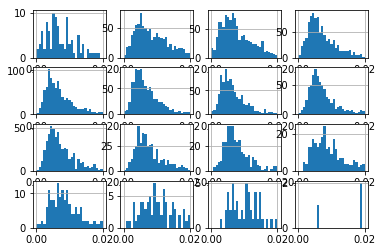

In [58]:
fig, axes = plt.subplots(4,4)
nplots = axes.size
for plot in zip(axes.flat, np.linspace(0.01, 0.98, nplots)):
    ax = plot[0]
    make_hist(trimmed, plot[1], ax, nbins=30, binmax=0.02)

In [42]:
list(zip(axes.flat, np.linspace(0.01, 0.99, nplots)))

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f52bb7cce48>, 0.01),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2f94780>,
  0.13250000000000001),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2e9e710>, 0.255),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2eb3b38>, 0.3775),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2ee0048>, 0.5),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2dd4390>,
  0.62250000000000005),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b31aed30>, 0.745),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52b2f21da0>,
  0.86749999999999994),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f52bb79f2b0>,
  0.98999999999999999)]

In [24]:
type(fig)

matplotlib.figure.Figure

In [25]:
type(axes)

numpy.ndarray

(3, 3)

In [29]:
type(axes[0,0])

matplotlib.axes._subplots.AxesSubplot

#### subtask: tranche cutting

In [85]:
def cut_tranche(df, percentile):
    """cut one percent of df, centered on percentile."""
    
    mindist = df['DIST_ADOP'].quantile(percentile - 0.005)
    maxdist = df['DIST_ADOP'].quantile(percentile + 0.005)
    selector = (df['DIST_ADOP'] < maxdist) & (df['DIST_ADOP'] > mindist)
    
    return pd.DataFrame(df[selector])

In [102]:
def test_sizes_cut_tranche(df):
    """Make sure that the sizes of tranches are 1% of overall df"""
    
    fullsize = len(df)
    onepercent = fullsize // 100
    
    actual = np.array([len(cut_tranche(df, pct/100)) for pct in range(1,100)])
    desired = np.ones_like(actual)*onepercent
    
    np.testing.assert_allclose(actual, desired, rtol=0.001, atol=0.0)

In [103]:
test_sizes_cut_tranche(trimmed)

Now rewrite original function using our tested function.

In [ ]:
def make_hist(df, percentile, ax, nbins, binmax, col='TEFF_UNC_REL'):
    """Given a dataframe, plot a histogram for data within a distance percentile."""

    bins = np.linspace(0, binmax, nbins)
    tranche = cut_tranche(df, percentile)
    tranche[col].hist(bins=bins, ax=ax)
#    ax.set_axis_off()
#    ax.set_xlim(0,0.05)
    

## Using qcut and groupby

In [106]:
trimmed['dist percentile'] = pd.qcut(trimmed['DIST_ADOP'], 100, labels=list(range(100)))

In [107]:
trimmed.head()

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL,dist percentile
13,8093.177734,5,17.046478,3.894807,4,0.058839,-1.675958,1,0.586000,223.323318,7.818055,11.022938,237.402389,37.855757,0.002106,89
21,8877.455078,4,338.060822,4.427508,2,0.127508,-3.106323,1,0.150400,-4.133572,4.987796,5.466160,237.321934,38.323073,0.038081,74
27,6080.926270,7,51.154720,3.811555,6,0.068476,0.022960,3,0.001255,3.552019,1.736180,11.819676,237.176079,38.149940,0.008412,90
31,5787.621582,7,28.281967,3.762244,6,0.043783,-0.943472,6,0.022553,77.411217,2.466664,1.986041,236.719375,38.279004,0.004887,35
33,8628.625977,3,270.294250,4.281405,2,0.018595,-3.141042,1,0.217600,39.422123,16.191286,10.153520,236.946675,38.242511,0.031325,88


In [109]:
percentiles = trimmed.groupby('dist percentile')

In [110]:
percentiles.get_group(1)

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL,dist percentile
11470,4573.694824,3,21.290327,4.381772,4,0.115465,-0.242967,1,0.165179,-42.699203,0.917709,0.300718,261.849731,56.379191,0.004655,1
11522,4579.021484,3,28.125858,4.297411,4,0.111308,-0.269667,2,0.005742,-24.770023,1.036665,0.383394,265.010123,55.707454,0.006142,1
16966,4356.639648,3,34.831680,4.414225,4,0.103706,-1.267955,2,0.045749,59.506329,1.485263,0.376697,273.993433,60.834992,0.007995,1
17604,4451.053711,3,48.848053,4.386624,4,0.062871,-0.939739,3,0.093949,56.244041,0.937254,0.412788,273.993433,60.834992,0.010974,1
18768,4599.909180,3,37.860271,4.140930,4,0.024408,-0.236286,2,0.010362,-26.827454,1.219601,0.399195,283.057314,60.114660,0.008231,1
24878,4782.394043,3,54.117519,4.438445,4,0.132316,-0.076184,1,0.126815,-14.598981,1.069687,0.400533,313.065199,62.683342,0.011316,1
30617,4157.135742,3,79.958809,3.882030,4,0.254311,-0.461963,1,0.092437,26.245388,1.009491,0.274932,326.018640,61.669319,0.019234,1
36103,4295.708984,3,92.702148,4.106380,4,0.179280,-0.297757,1,0.038100,-8.255230,1.018667,0.315427,342.591708,54.853543,0.021580,1
36727,4290.665039,3,88.177528,3.968507,4,0.222269,-0.302237,1,0.140491,-0.920671,1.436218,0.314556,342.591708,54.853543,0.020551,1
40856,4289.105469,3,66.482681,3.961591,4,0.207151,-0.267947,1,0.023900,-2.274535,0.859277,0.337117,356.655690,50.414279,0.015500,1


In [112]:
percentiles.get_group(1).describe()

,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,RV_ADOP,RV_ADOP_UNC,DIST_ADOP,L,B,TEFF_UNC_REL
count,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000
mean,4727.885742,3.366850,69.639656,4.034546,3.944444,0.137874,-0.615531,2.233701,0.076906,-5.411476,1.384050,0.357380,141.073298,9.247320,0.014530
std,690.155123,1.781637,81.083128,0.514249,1.249988,0.121627,0.539590,1.422962,0.068746,52.035001,0.882624,0.051351,74.256789,47.276134,0.015001
min,4000.956299,1.000000,0.009644,0.883440,1.000000,0.000027,-3.707536,1.000000,0.000002,-328.444122,0.364567,0.250750,0.009148,-81.235233,0.000002
25%,4294.304077,3.000000,25.912807,3.899532,4.000000,0.064949,-0.970865,1.000000,0.024469,-28.430404,0.918565,0.317029,83.762785,-35.658511,0.005634
50%,4473.955078,3.000000,51.987497,4.141840,4.000000,0.111644,-0.453271,2.000000,0.057444,-3.133690,1.208636,0.363918,131.353801,18.474600,0.011009
75%,4938.078857,3.000000,80.602448,4.356649,4.000000,0.166689,-0.222896,3.000000,0.112818,20.646490,1.577514,0.402751,187.158103,51.347441,0.017504
max,8688.962891,9.000000,2031.588135,4.908279,7.000000,1.583730,0.726999,7.000000,0.829000,365.113220,15.167348,0.433217,359.887431,88.268082,0.324785
